In [10]:
import pysam
import numpy as np
import seaborn as sns
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

In [3]:
alignment = "/projects1/microbiome_coprolite/coprolite_evolution/tmp/assembly_contigs/ZSM028.sorted.bam"

In [4]:
def avg_coverage(pysam_cov):
    """Computes average coverage of a reference
    Args:
        pysam_cov (np.array): Four dimensional array of coverage for each base
    Returns:
        float: mean coverage of reference
    """
    A = np.array(pysam_cov[0], dtype=int)
    C = np.array(pysam_cov[1], dtype=int)
    G = np.array(pysam_cov[2], dtype=int)
    T = np.array(pysam_cov[3], dtype=int)
    cov_all_bases = A + C + G + T
    cov = np.mean(cov_all_bases)
    return cov

In [5]:
samfile = pysam.AlignmentFile(alignment, "rb")
references = samfile.references


In [6]:
cov_ref = {}
for r in tqdm(references):
    cov_ref[r] = avg_coverage(samfile.count_coverage(contig=r))

100%|██████████| 17081/17081 [04:39<00:00, 61.09it/s] 


In [7]:
df = pd.Series(cov_ref).to_frame(name='coverage')

In [8]:
df.coverage.describe()

count    17081.000000
mean        29.595170
std         30.334234
min          4.583851
25%         16.622430
50%         20.705628
75%         32.328532
max       1762.386119
Name: coverage, dtype: float64

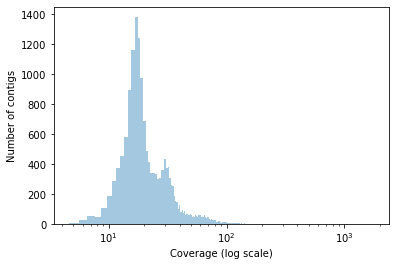

In [14]:
ax = sns.distplot(df.coverage, bins=int(df.coverage.max()), kde=False)
ax.set_xscale('log')
plt.ylabel("Number of contigs")
plt.xlabel("Coverage (log scale)")
plt.savefig("../../plots/coverage_distribution.png", dpi=300)

In [73]:
df.shape

(17081, 1)